# Habitat Suitability under Climate Change

## Study Question: What are the potential climate change impacts on habitats where _Rhododendron maximum_ currently exist?

### Our changing climate is altering where key species can live.This project creates a habitat suitability model for _Rododendron maximum_ using the [MACAv2 dataset](https://www.climatologylab.org/maca.html). This suitability assessment will be based on combining multiple data layers related to soil, topography, and climate. 

### _Rhododendron maximum_ is found in North Carolina and West Virginia which are both part of the Appalachian Mountains. Dudleya, et al identify _Rhododendron maximum_ as an emerging foundation species following the decline of the American Chestnut and Eastern Hemlock. In addition, "Rhododendron affects numerous riparian forest ecosystem processes, including decomposition and nutrient cycling." Of the four hardiness division established by Sakai, et al, _Rhododendron maximum_ is listed in the very hardy category with a tolerance for temperatures down to -40 F, although the USDA recommends a minimum temperature of -13 F with 150 frost free days. _Rhododendron maximum_ is adapted to medium & coarse textured soils with drought tolerance and medium tolerance for fire. It is found at elevations up to 6200 feet which includes all of Wayne County, WV and most of Jackson County, NC except for the highest peak Richland Balsam on the Blue Ridge Parkway. 


## Climate Models
### This study will look at data from 1988 to 2018 in Jackson County, NC and Wayne County, WV. This historic time period was chosen because of the severe drought on the east coast of the US. According to Changnon, the 1988 drought was the worst in a century. In addition, climate change from 2030 to 2060 will be projected. A range of climate models were selected using a Future Climate Scatter tool from the climate toolbox so that the models have different national origins. For each model, here is some information on the model components and projection for Moscow, Idaho between 2040 and 2069 based upon the RCP8.5 scenario. The scenario assumes high greenhouse gas emissions as the world remains heavily reliant on fossil fuels and continued global economic growth. A key aspect of RCP8.5 is the assumption of minimal implementation of policies aimed at mitigating climate change, so this is a worst case scenario.

* **MIROC5** - Model for Interdisciplinary Research on Climate (Japan)
    * Future projection [Temp. 85.1 F; Precip. 10.1 in.]
    * Integrates multiple components like atmosphere, ocean, land, sea ice, and rivers to study complex interactions 
* **NorESM1-M** - Norwegian Earth System Model (Norway)
    * Future projection [Temp. 88.4 F; Precip. 9.7 in.]
    * Includes components for modeling the atmosphere, ocean, sea ice, land, and biogeochemical processes and capabilities for simulating interactions between chemistry, aerosols, clouds, and radiation.
* **IPSL-CM5A-MR** - Institut Pierre Simon Laplace fifth generation climate model medium resolution (France)
    * Past projection [Temp. 80.0 F; Precip. 8.6 in.]
    *  Includes components for simulating various aspects of the Earth's climate system, including atmospheric physics, ocean dynamics, and land surface processes.
* **GFDL-ESM2M** - Geophysical Fluid Dynamics Laboratory Earth System Model (USA)
    * Past projection [Temp. 79.5 F; Precip. 7.9 in.] 
    * Includes representations of biogeochemical cycles, particularly the carbon cycle. 
### Historic and projected climate parameters will inform the habitat suitability analysis for _Rhododendron maximum_ along the Appalachian Mountains.


## Information Sources
* Maura P. Dudleya, Mary Freeman, Seth Wenger, Rhett Jackson, and Catherine M. Pringle. 15 September 2020. Rethinking foundation species in a changing world: the case for Rhododendron maximum as an emerging foundation species in shifting ecosystems of the Southern Appalachians. _Forest Ecology and Management_ Volume 472, p.  118240. available online: https://doi.org/10.1016/j.foreco.2020.118240
* A. Sakai, L. Fuchigami, and C.J. Weiser. 1986. Cold Hardiness in the Genus Rhododendron. _Journal of the American Society for Horticultural Science_ 111(2):273-280. 
* USDA PLANTS Database. available online: https://plants.usda.gov/plant-profile/RHMA4/characteristics
* Flora of North America Association. 2020. available online: http://floranorthamerica.org/Rhododendron_maximum
* Stanley A. Changnon. 01 Sep 1989. The 1988 Drought, Barges, and Diversion. _Bulletin of the American Meteorological Society_ Volume 70: Issue 9 pp:1092-1104. available online: https://journals.ametsoc.org/view/journals/bams/70/9/1520-0477_1989_070_1092_tdbad_2_0_co_2.xml
* Hegewisch, K.C., Laquindanum, V., Fleishman, E., Hartmann, H., and Mills-Novoa, M.. Climate Toolbox Tool Summary series. https://ClimateToolbox.org.
* Explainer: The high-emissions ‘RCP8.5’ global warming scenario. available online at: https://www.carbonbrief.org/explainer-the-high-emissions-rcp8-5-global-warming-scenario/
* Google Gemini was used to identify sources and compile known information. In addition, Google Gemini helped identify coding errors and suggested remedies.

In [ ]:
pip install pygbif

In [1]:
# Load packages
# For reproducible file paths
import os # Interoperable file paths
from glob import glob # Find files by pattern
import pathlib  # Work with file and directory paths

# For gbif packages
import pygbif.occurrences as occ
import pygbif.species as species
from getpass import getpass

# For HTTP requests and unzipping
import requests 
import time
import zipfile 

# For spatial data
import geopandas as gpd # Work with geospatial data
import xrspatial # library for geospatial analysis

# For other types of data
import earthaccess # For elevation data
from math import floor, ceil
import matplotlib.pyplot as plt # # Import module for plotting functionality
import numpy as np
import pandas as pd
import rasterio  # Read, write, and manipulate raster datasets
import rioxarray as rxr # For combining data into a multi-dimensional arrays
import rioxarray.merge as rxrmerge # Import the function for merging raster datasets
import xarray as xr # Library for working with labeled muli-dimensional arrays

# For invalid geometries
from shapely.geometry import MultiPolygon, Polygon

# For visualization
import holoviews as hv
import hvplot.pandas
import hvplot.xarray


c:\Users\stem2\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'Documents',
    'eaclassprojects',
    'climate_models',
)
os.makedirs(data_dir, exist_ok=True)
pathlib.Path.home()


WindowsPath('C:/Users/stem2')

## Confirm Species Distribution using  [Global Biodiversity Information Facility (GBIF)](https://www.gbif.org/)

In [3]:
# set gbif directory for study species
gbif_dir = os.path.join(data_dir, 'gbif_rhodo')

In [4]:
# access gbif
reset_credentials = False
# GBIF needs a username, password, and email
credentials = dict(
    GBIF_USER=(input, 'GBIF username:'),
    GBIF_PWD=(getpass, 'GBIF password:'),
    GBIF_EMAIL=(input, 'GBIF email:'),
)
for env_variable, (prompt_func, prompt_text) in credentials.items():
    # Delete credential from environment if requested
    if reset_credentials and (env_variable in os.environ):
        os.environ.pop(env_variable)
    # Ask for credential and save to environment
    if not env_variable in os.environ:
        os.environ[env_variable] = prompt_func(prompt_text)

In [5]:
# species name
species_name = 'Rhododendron maximum'

# species info for gbif
species_info = species.name_lookup(species_name,
                                   rank = 'SPECIES')

# look at first result
first_result = species_info['results'][0]

# get species key
species_key = first_result['nubKey']

# verify
first_result['species'], species_key


('Rhododendron maximum', 2883094)

In [6]:
# Identify code for species
species_key = 2883094 # Replace with a valid species key

# set a file pattern
os.makedirs(gbif_dir, exist_ok=True)

gbif_pattern = os.path.join(gbif_dir, '*.csv')

# download once
if not glob(gbif_pattern):
      
      # submit query to GBIF
      gbif_query = occ.download([
                f"speciesKey = {species_key}",
                "hasCoordinate = True",
            ])
      
      # only download once
      if not 'GBIF_DOWNLOAD_KEY' in os.environ:
            os.environ['GBIF_DOWNLOAD_KEY'] = gbif_query[0]

            download_key = gbif_query[0]
      
            # wait for download to build
            wait = occ.download_meta(download_key)['status']
            while not wait == 'SUCCEEDED':
                  wait = occ.download_meta(download_key)['status']
                  time.sleep(5)

      # download data
      download_info = occ.download_get(
           os.environ['GBIF_DOWNLOAD_KEY'],
           path = data_dir
      )

      # unzip data
      with zipfile.ZipFile(download_info['path'], 'r') as download_zip:
            download_zip.extractall(path = gbif_dir)

# find csv file path
gbif_path = glob(gbif_pattern)[0]             

            

In [7]:
# open gbif data
gbif_df = pd.read_csv(
    gbif_path,
    delimiter ='\t'
)
gbif_df.head()


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,999821,aab0cf80-0c64-11dd-84d1-b8a03c50a862,LD:General:1003027,Plantae,Tracheophyta,Magnoliopsida,Ericales,Ericaceae,Rhododendron,Rhododendron maximum,...,NaN,NaN,CC_BY_NC_4_0,NaN,Mats Krabb,NaN,NaN,2025-02-23T03:04:12.479Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;OCCURRENCE_STATUS...
1,930742272,0096dfc0-9925-47ef-9700-9b77814295f1,http://bioimages.vanderbilt.edu/ind-kirchoff/b...,Plantae,Tracheophyta,Magnoliopsida,Ericales,Ericaceae,Rhododendron,Rhododendron maximum,...,Bruce K. Kirchoff,2004-06-28T00:00:00,CC0_1_0,NaN,Bruce K. Kirchoff,NaN,native,2025-02-06T17:33:40.039Z,StillImage,NaN
2,930742223,0096dfc0-9925-47ef-9700-9b77814295f1,http://bioimages.vanderbilt.edu/ind-kirchoff/b...,Plantae,Tracheophyta,Magnoliopsida,Ericales,Ericaceae,Rhododendron,Rhododendron maximum,...,Bruce K. Kirchoff,2004-06-28T00:00:00,CC0_1_0,NaN,Bruce K. Kirchoff,NaN,native,2025-02-06T17:33:40.502Z,StillImage,NaN
3,930741667,0096dfc0-9925-47ef-9700-9b77814295f1,http://bioimages.vanderbilt.edu/ind-baskauf/49...,Plantae,Tracheophyta,Magnoliopsida,Ericales,Ericaceae,Rhododendron,Rhododendron maximum,...,Steven J. Baskauf,2006-06-17T00:00:00,CC0_1_0,NaN,Steven J. Baskauf,NaN,native,2025-02-06T17:33:39.001Z,StillImage,NaN
4,930740779,0096dfc0-9925-47ef-9700-9b77814295f1,http://bioimages.vanderbilt.edu/ind-baskauf/26...,Plantae,Tracheophyta,Magnoliopsida,Ericales,Ericaceae,Rhododendron,Rhododendron maximum,...,Steven J. Baskauf,2003-05-29T00:00:00,CC0_1_0,NaN,Steven J. Baskauf,NaN,native,2025-02-06T17:33:43.581Z,StillImage,NaN


In [8]:
# make gbif data spatial
gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df,
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude,
            gbif_df.decimalLatitude
        ),
        crs = 'EPSG:4326'
))


In [9]:
# plot Rhododendron locations
gbif_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    title = 'Rhododendron maximum occurrences in GBIF',
    fill_color = None, line_color = 'purple',
    frame_width = 600
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

## Location data
### From [US Census Tiger files](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html)

Shapefile already exists. Skipping download.


<Axes: >

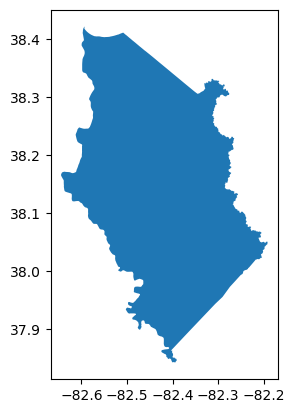

In [10]:
# Define the URL of the shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"

# Download the shapefile to the specified directory
zip_filepath = os.path.join(data_dir, "tl_2023_us_county.zip") # full path to zip file.
shapefile_path = os.path.join(data_dir, "tl_2023_us_county.shp") # Construct the path to the extracted shapefile

# Check if the shapefile already exists
if not os.path.exists(shapefile_path):
    # Download the shapefile only if it doesn't exist
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Extract the shapefile
        with open(zip_filepath, "wb") as f:
            f.write(response.content)
        # Extract the shapefile to the specified directory
        with zipfile.ZipFile(zip_filepath, "r") as zip_ref:
            zip_ref.extractall(data_dir) #extract to the data_dir

        print("Shapefile downloaded and extracted")
    
    except requests.exceptions.RequestException as e:
        print(f"Error downloading shapefile: {e}")
    except zipfile.BadZipFile as e:
        print(f"Error extracting zip file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

else:
    print("Shapefile already exists. Skipping download.")

# Load the shapefile into a GeoDataFrame
county_data = gpd.read_file(shapefile_path)

# Filter for a specific counties 
wayne_county = county_data[(county_data['STATEFP'] == '54') & (county_data['COUNTYFP'] == '099')]
jackson_county = county_data[(county_data['STATEFP'] == '37') & (county_data['COUNTYFP'] == '099')]

# Plot the shapefile
wayne_county.plot()

<Axes: >

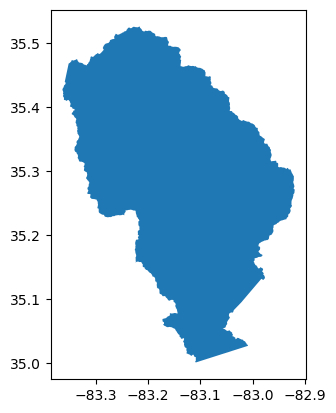

In [11]:
jackson_county.plot()

## Soil data
### From The [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/) 

In [12]:
# Code for acquiring soil data 
def get_soil_data(min_lon, max_lon, min_lat, max_lat, soil_property, depth="30_60"):
    """
    Accesses Polaris soil data for a specified bounding box.
    """
    # Round coordinates to nearest integer boundaries
    min_lon = floor(min_lon)
    max_lon = ceil(max_lon)
    min_lat = floor(min_lat)
    max_lat = ceil(max_lat)

    soil_url_template = (
        "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
        f"/{soil_property}"
        "/mean"
        f"/{depth}/"
        "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
    )
    soil_url = soil_url_template.format(
        min_lat=int(min_lat), max_lat=int(max_lat), min_lon=int(min_lon), max_lon=int(max_lon)
    )

    try:
        soil_da = rxr.open_rasterio(soil_url, mask_and_scale=True).squeeze()
        return soil_da
    except Exception as e:
        print(f"Error accessing soil data for {soil_url}: {e}")
        return None

def get_soil_data_multiple_locations(bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat, soil_property, depth="30_60"):
    """
    Retrieves soil data for multiple 1-degree grid cells within a bounding box.
    """
    soil_data_dict = {}
    for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
        for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):
            max_lon = min_lon + 1
            max_lat = min_lat + 1
            soil_da = get_soil_data(min_lon, max_lon, min_lat, max_lat, soil_property, depth)
            if soil_da is not None:
                soil_data_dict[(min_lon, min_lat)] = soil_da
    return soil_data_dict

# Areas of interest 
nc_county = type("obj",(object,),{"total_bounds":(-83, 35, -82, 36)}) 
wv_county = type("obj",(object,),{"total_bounds":(-83, 37, -82, 39)}) 

# Accessing data for Jackson County, NC
nc_bounds_min_lon, nc_bounds_min_lat, nc_bounds_max_lon, nc_bounds_max_lat = nc_county.total_bounds
nc_sand_data = get_soil_data_multiple_locations(
    nc_bounds_min_lon, 
    nc_bounds_min_lat, 
    nc_bounds_max_lon, 
    nc_bounds_max_lat,
    soil_property="sand"
    )
nc_ph_data = get_soil_data_multiple_locations(
    nc_bounds_min_lon,
    nc_bounds_min_lat,
    nc_bounds_max_lon,
    nc_bounds_max_lat,
    soil_property="ph"
    )


# Accessing data for Wayne County
wv_bounds_min_lon, wv_bounds_min_lat, wv_bounds_max_lon, wv_bounds_max_lat = wv_county.total_bounds
wv_sand_data = get_soil_data_multiple_locations(
    wv_bounds_min_lon,
    wv_bounds_min_lat, 
    wv_bounds_max_lon, 
    wv_bounds_max_lat,
    soil_property="sand"
    )

wv_ph_data = get_soil_data_multiple_locations(
    wv_bounds_min_lon,
    wv_bounds_min_lat,
    wv_bounds_max_lon,
    wv_bounds_max_lat,
    soil_property="ph"
    )

# Accessing the sand data for NC
if (-83, 35) in nc_sand_data:
    nc_sand_data = nc_sand_data[(-83, 35)]
    print(nc_sand_data)
else:
    print("Soil data not found for location (-83, 35)")

# Accessing the ph data for NC
if (-83, 35) in nc_ph_data:
    nc_ph_data = nc_ph_data[(-83, 35)]
    print(nc_ph_data)
else:
    print("Soil data not found for location (-83, 35)")

# Accessing the soil pH data for WV
if (-83, 37) in wv_sand_data:
    wv_sand_data = wv_sand_data[(-83, 37)]
    print (wv_sand_data)
else:
    print("Soil data not found for location (-83, 37)")

# Accessing the soil pH data for WV
if (-83, 37) in wv_ph_data:
    wv_ph_data = wv_ph_data[(-83, 37)]
    print(wv_ph_data)
else:
    print("Soil data not found for location (-83, 37)")


<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 36.0 36.0 36.0 36.0 ... 35.0 35.0 35.0 35.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 36.0 36.0 36.0 36.0 ... 35.0 35.0 35.0 35.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 38.0 38.0 38.0 38.0 ... 37.0 37.0 37.0 37.0
    spatial_ref

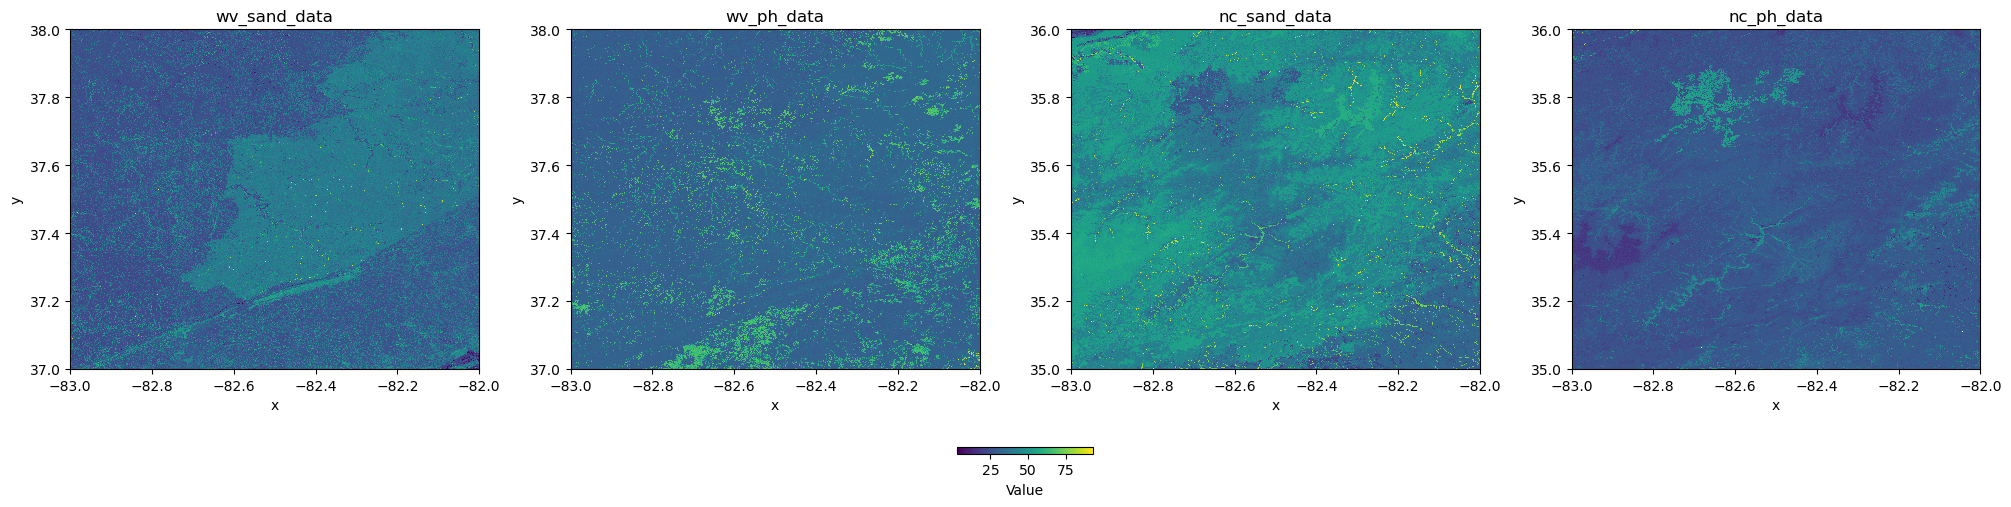

In [ ]:
# Combine the lists
soil_view = [wv_sand_data, wv_ph_data, nc_sand_data, nc_ph_data]
soil_title = ['wv_sand_data', 'wv_ph_data', 'nc_sand_data', 'nc_ph_data']

# Set up subplots (adjust rows and columns for layout)
fig, axes = plt.subplots(nrows=1, ncols=len(soil_view), figsize=(20, 5), constrained_layout=True)

# Loop through each raster, open it, and plot in a subplot
cbar_mappable = None  # To store the QuadMesh object for the colorbar
for i, soil_da in enumerate(soil_view):

    # Plot the raster on the corresponding subplot
    quadmesh = soil_da.plot(ax=axes[i], add_colorbar=False)
    axes[i].set_title(soil_title[i])  # Add a title to each subplot

    # Store the QuadMesh object for the colorbar
    if cbar_mappable is None:
        cbar_mappable = quadmesh

# Add a global colorbar
fig.colorbar(cbar_mappable, ax=axes, orientation="horizontal", fraction=0.02, pad=0.1).set_label("Value")

plt.show()

## Topographic data
### Elevation data is from the [SRTM dataset](https://www.earthdata.nasa.gov/data/instruments/srtm), available through the [earthaccess API](https://earthaccess.readthedocs.io/en/latest/quick-start/).

In [21]:
# From Gemini

def search_and_print_datasets(keyword, count=10):
    """Searches for datasets and prints their short names and titles."""
    datasets = earthaccess.search_datasets(keyword=keyword, count=count)
    for dataset in datasets:
        print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])

def download_and_process_elevation(short_name, bounds, data_dir, pattern):
    """Downloads, extracts, and combines elevation data for a given location."""
    if not glob(pattern):
        results = earthaccess.search_data(short_name=short_name, bounding_box=bounds)
        earthaccess.download(results, data_dir)

    da_list = []
    for path in glob(pattern):
        tile_da = rxr.open_rasterio(path, mask_and_scale=True).squeeze()
        cropped_da = tile_da.rio.clip_box(*bounds)
        da_list.append(cropped_da)
    return rxrmerge.merge_arrays(da_list)

# Data for each location
wv_data_dir = "./wv_data"
nc_data_dir = "./nc_data"
wv_county = type("obj",(object,),{"total_bounds":(-83, 37, -82, 39)})
nc_county = type("obj",(object,),{"total_bounds":(-83, 35, -82, 36)})

# Login to earthaccess
earthaccess.login()

# Search and print datasets
search_and_print_datasets(keyword='SRTM DEM', count=11)

# Download and process elevation data for Wayne County, WV
wv_srtm_pattern = os.path.join(wv_data_dir, '*.hgt.zip')
wv_bounds = tuple(wv_county.total_bounds)
wv_srtm_da = download_and_process_elevation(
    short_name="WV-SRTMGL1",
    bounds=wv_bounds,
    data_dir=wv_data_dir,
    pattern=wv_srtm_pattern,
)

# Download and process elevation data for Jackson County, NC
nc_srtm_pattern = os.path.join(nc_data_dir, '*.hgt.zip')
nc_bounds = tuple(nc_county.total_bounds)
nc_srtm_da = download_and_process_elevation(
    short_name="NC-SRTMGL1",
    bounds=nc_bounds,
    data_dir=nc_data_dir,
    pattern=nc_srtm_pattern,
)

print("West Virginia elevation data processed.")
print("North Carolina elevation data processed.")

INFO:Datasets found: 36


NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002


INFO:Granules found: 0


IndexError: list index out of range

## Climate model data
### [MACAv2 data]("http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html") is used for both historic and future climate data for at least four of the CMIP models. Overall, this project will combine 8 climate rasters for each site.


In [ ]:
# From Gemini
import xarray as xr
import pandas as pd

def convert_longitude(longitude):
    """Convert longitude range from 0-360 to -180-180."""
    return (longitude - 360) if longitude > 180 else longitude

def get_climate_model_data(state_site, site_gdf, variable='pr', start_year=2096):
    """
    Retrieves and processes climate model data for a given location.

    Args:
        state_site (str): Name of the state or site.
        site_gdf (geopandas.GeoDataFrame): GeoDataFrame representing the site's geometry.
        variable (str): Climate variable (e.g., 'pr' for precipitation).
        start_year (int): Starting year for the data.

    Returns:
        list: A list of dictionaries containing processed data.
    """
    end_year = start_year + 3
    miroc5_url = (
        'http://thredds.northwestknowledge.net:8080'
        '/thredds/dodsC/MACAV2/MIROC5/'
        f'macav2metdata_{variable}_MIROC5_r1i1p1_rcp45_'
        f'{start_year}_{end_year}_CONUS_monthly.nc'
    )
    da = xr.open_dataset(miroc5_url).squeeze().precipitation
    bounds = site_gdf.to_crs(da.rio.crs).total_bounds
    da = da.assign_coords(lon=("lon", [convert_longitude(l) for l in da.lon.values]))
    da = da.rio.set_spatial_dims(x_dim='lon', y_dim='lat')
    da = da.rio.clip_box(*bounds)

    return [
        dict(
            state_site=state_site,
            variable=variable,
            start_year=start_year,
            da=da,
        )
    ]

# Assuming cherokee_county and jackson_county are defined elsewhere.
# Example of dummy data.
cherokee_county = type("obj",(object,),{"to_crs": lambda x: type("obj",(object,),{"total_bounds":(-95.5, 35.5, -94.0, 37.0)})})
jackson_county = type("obj",(object,),{"to_crs": lambda x: type("obj",(object,),{"total_bounds":(-83.5, 35.0, -82.5, 36.0)})})

# Process data for both locations
all_data = []
for state_site, site_gdf in {'Oklahoma': cherokee_county, 'North Carolina': jackson_county}.items():
    all_data.extend(get_climate_model_data(state_site, site_gdf))

# Create a DataFrame from the combined data
df = pd.DataFrame(all_data)

# Print relevant columns
print(df[['state_site', 'variable', 'start_year']])

## Climate model reflection


## HARMONIZE DATA
### Grids for all data match each other using the [reproject, match method from rioxarray](https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match). 

In [ ]:
# Harmonize data

## FUZZY LOGIC MODEL
### The [`scikit-fuzzy`](https://pythonhosted.org/scikit-fuzzy/) library is used to convert data into values from 0 to 1 using _Rhododendron maximum_ habitat information. Layers for each variable are combined to get a single suitability number for each square.

In [ ]:
# Create fuzzy logic suitability model


## RESULTS
### Plots showing habitat suitability for _Rhododendron maximum_ in North Carolina and Maine over 30 year periods

In [ ]:
# Create plots

## Results interpretation